**IMPORT LIBRARY**

---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**IMPORT AND PREPROCESSING DATA**

---



In [ ]:
import requests
url = 'https://dqydj.com/historical-home-prices/'
html = requests.get(url).content
df_table = pd.read_html(html)
df1 = df_table[0]
print(df1)

    Month of Observation Median Home Price (NSA) Inflation Adjusted Price
0             1953-01-01              $18,080.26              $206,198.57
1             1953-02-01              $18,080.26              $206,976.68
2             1953-03-01              $18,080.26              $206,198.57
3             1953-04-01              $18,122.25              $206,677.45
4             1953-05-01              $18,143.25              $206,141.98
..                   ...                     ...                      ...
838           2022-11-01             $377,684.47              $384,854.75
839           2022-12-01             $375,329.70              $383,633.07
840           2023-01-01             $374,926.03              $380,180.79
841           2023-02-01             $379,770.11              $382,955.06
842           2023-03-01             $385,556.10              $387,506.64

[843 rows x 3 columns]


In [ ]:
df1.drop(df1.iloc[:, 2:], inplace=True, axis=1)
df1=df1[1:]
df1

,Month of Observation,Median Home Price (NSA)
1,1953-02-01,"$18,080.26"
2,1953-03-01,"$18,080.26"
3,1953-04-01,"$18,122.25"
4,1953-05-01,"$18,143.25"
5,1953-06-01,"$18,143.25"
...,...,...
838,2022-11-01,"$377,684.47"
839,2022-12-01,"$375,329.70"
840,2023-01-01,"$374,926.03"
841,2023-02-01,"$379,770.11"


In [ ]:
df1['Month of Observation'] = pd.to_datetime(df1['Month of Observation'],dayfirst=True)
df1['Median Home Price (NSA)'] = df1['Median Home Price (NSA)'].replace('[\$,]', '', regex=True).astype(float)

<ipython-input-4-606ed260b4f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month of Observation'] = pd.to_datetime(df1['Month of Observation'],dayfirst=True)
<ipython-input-4-606ed260b4f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Median Home Price (NSA)'] = df1['Median Home Price (NSA)'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df1.groupby(pd.PeriodIndex(df1['Month of Observation'], freq="M"))['Median Home Price (NSA)'].mean().reset_index()
data1=df1[df1["Month of Observation"].between('1954-07-01','2023-03-01')]

In [ ]:
data1.rename(columns={'Month of Observation':'DATE'}, inplace=True)
data1

<ipython-input-6-c1d976462333>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'Month of Observation':'DATE'}, inplace=True)


,DATE,Median Home Price (NSA)
18,1954-07-01,18290.25
19,1954-08-01,18332.24
20,1954-09-01,18374.24
21,1954-10-01,18353.24
22,1954-11-01,18353.24
...,...,...
838,2022-11-01,377684.47
839,2022-12-01,375329.70
840,2023-01-01,374926.03
841,2023-02-01,379770.11


In [ ]:
data1.dtypes

DATE                       datetime64[ns]
Median Home Price (NSA)           float64
dtype: object

In [ ]:
import requests
url = 'https://www.usinflationcalculator.com/inflation/average-prices-for-selected-grocery-store-items-2015-present/'
html = requests.get(url).content
df_table = pd.read_html(html)
df2 = df_table[0]
print(df2)

      0     1     2     3     4     5               6     7     8     9   \
0   Year   Jan   Feb   Mar   Apr   May             Jun   Jul   Aug   Sep   
1   1948  13.9  12.3   6.3  10.8  12.4            12.2  12.0  10.3   5.9   
2   1949  -2.2  -2.6   0.0  -2.5  -3.9            -4.6  -6.9  -6.6  -5.2   
3   1950  -4.4  -2.3  -2.6  -2.6  -1.5            -0.7   3.3   3.7   2.9   
4   1951  13.4  15.8  14.9  14.4  13.9            11.9   9.4   7.9   8.2   
..   ...   ...   ...   ...   ...   ...             ...   ...   ...   ...   
72  2019   0.6   1.2   1.4   0.7   1.2             0.9   0.6   0.5   0.6   
73  2020   0.7   0.8   1.1   4.1   4.8             5.6   4.6   4.6   4.1   
74  2021   3.7   3.5   3.3   1.2   0.7             0.9   2.6   3.0   4.5   
75  2022   7.4   8.6  10.0  10.8  11.9            12.2  13.1  13.5  13.0   
76  2023  11.3  10.2   8.4   7.1   5.8  Avail. July 12   NaN   NaN   NaN   

      10    11    12    13  
0    Oct   Nov   Dec   Ave  
1    4.8   2.2  -1.1   8.5  


In [ ]:
df2.drop(df2.iloc[:, 13:], inplace=True, axis=1)
df2.columns = df2.iloc[0]
df2=df2[1:]
df2

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1948,13.9,12.3,6.3,10.8,12.4,12.2,12.0,10.3,5.9,4.8,2.2,-1.1
2,1949,-2.2,-2.6,0.0,-2.5,-3.9,-4.6,-6.9,-6.6,-5.2,-5.3,-3.3,-3.7
3,1950,-4.4,-2.3,-2.6,-2.6,-1.5,-0.7,3.3,3.7,2.9,5.2,5.2,9.5
4,1951,13.4,15.8,14.9,14.4,13.9,11.9,9.4,7.9,8.2,8.9,9.6,7.6
5,1952,4.7,0.7,1.0,2.0,1.7,2.0,3.0,4.0,2.6,1.3,0.6,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2019,0.6,1.2,1.4,0.7,1.2,0.9,0.6,0.5,0.6,1.0,1.0,0.7
73,2020,0.7,0.8,1.1,4.1,4.8,5.6,4.6,4.6,4.1,4.0,3.6,3.9
74,2021,3.7,3.5,3.3,1.2,0.7,0.9,2.6,3.0,4.5,5.4,6.4,6.5
75,2022,7.4,8.6,10.0,10.8,11.9,12.2,13.1,13.5,13.0,12.4,12.0,11.8


In [ ]:
df2 = df2.set_index('Year').stack().droplevel(1).reset_index(name='% Food Inflation')
df2

,Year,% Food Inflation
0,1948,13.9
1,1948,12.3
2,1948,6.3
3,1948,10.8
4,1948,12.4
...,...,...
901,2023,10.2
902,2023,8.4
903,2023,7.1
904,2023,5.8


In [ ]:
df2['Month']=''
df2['Month'] = pd.to_datetime(df2['Month'])
df2['Month'] = pd.date_range('1948-01-01', periods=len(df2), freq='M').strftime("%m")
df2['Year']= df2['Year'] + "-" + df2['Month']
df2['Year'] = pd.to_datetime(df2['Year'], dayfirst=True)
df2

,Year,% Food Inflation,Month
0,1948-01-01,13.9,01
1,1948-02-01,12.3,02
2,1948-03-01,6.3,03
3,1948-04-01,10.8,04
4,1948-05-01,12.4,05
...,...,...,...
901,2023-02-01,10.2,02
902,2023-03-01,8.4,03
903,2023-04-01,7.1,04
904,2023-05-01,5.8,05


In [ ]:
df2.drop(df2.iloc[:, 2:], inplace=True, axis=1)
data2=df2[df2["Year"].between('1954-07-01','2023-03-01')]
data2['% Food Inflation'] = data2['% Food Inflation'].astype(float)
data2

<ipython-input-12-ddbe9684786b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['% Food Inflation'] = data2['% Food Inflation'].astype(float)


,Year,% Food Inflation
78,1954-07-01,0.3
79,1954-08-01,-0.7
80,1954-09-01,-2.0
81,1954-10-01,-2.0
82,1954-11-01,-1.3
...,...,...
898,2022-11-01,12.0
899,2022-12-01,11.8
900,2023-01-01,11.3
901,2023-02-01,10.2


In [ ]:
data2.rename(columns={'Year':'DATE'}, inplace=True)
data2

<ipython-input-13-6495205227dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns={'Year':'DATE'}, inplace=True)


,DATE,% Food Inflation
78,1954-07-01,0.3
79,1954-08-01,-0.7
80,1954-09-01,-2.0
81,1954-10-01,-2.0
82,1954-11-01,-1.3
...,...,...
898,2022-11-01,12.0
899,2022-12-01,11.8
900,2023-01-01,11.3
901,2023-02-01,10.2


In [ ]:
data2.dtypes

DATE                datetime64[ns]
% Food Inflation           float64
dtype: object

In [ ]:
import requests
url = 'https://www.usinflationcalculator.com/inflation/energy-prices-gasoline-electricity-and-fuel-oil-2015-present/'
html = requests.get(url).content
df_table = pd.read_html(html, header=None)
df3 = df_table[0]
print(df3)

      0     1     2     3      4      5               6      7     8     9   \
0   Year   Jan   Feb   Mar    Apr    May             Jun    Jul   Aug   Sep   
1   1958   1.9  -0.5  -0.5   -0.9    0.0             0.0    0.5   1.9   0.9   
2   1959  -0.9   1.4   1.4    2.3    1.4             1.4    0.5   0.5   1.4   
3   1960   4.2   2.8   2.3    2.3    1.8             2.8    3.2   3.2   2.7   
4   1961   1.8   1.8   1.8   -0.4    0.5             0.0    0.0  -0.4   0.0   
..   ...   ...   ...   ...    ...    ...             ...    ...   ...   ...   
62  2019  -4.8  -5.0  -0.4    1.7   -0.5            -3.4   -2.0  -4.4  -4.8   
63  2020   6.2   2.8  -5.7  -17.7  -18.9           -12.6  -11.2  -9.0  -7.7   
64  2021  -3.6   2.4  13.2   25.1   28.5            24.5   23.8  25.0  24.8   
65  2022  27.0  25.6  32.0   30.3   34.6            41.6   32.9  23.8  19.8   
66  2023   8.7   5.2  -6.4   -5.1  -11.7  Avail. July 12    NaN   NaN   NaN   

      10    11    12    13  
0    Oct   Nov   Dec  

In [ ]:
df3.drop(df3.iloc[:, 13:], inplace=True, axis=1)
df3.columns = df3.iloc[0]
df3=df3[1:]
df3

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1958,1.9,-0.5,-0.5,-0.9,0.0,0.0,0.5,1.9,0.9,1.4,-0.5,-0.9
2,1959,-0.9,1.4,1.4,2.3,1.4,1.4,0.5,0.5,1.4,2.8,3.7,4.7
3,1960,4.2,2.8,2.3,2.3,1.8,2.8,3.2,3.2,2.7,0.9,1.8,1.3
4,1961,1.8,1.8,1.8,-0.4,0.5,0.0,0.0,-0.4,0.0,0.0,-0.4,-1.3
5,1962,-1.3,-0.4,-0.9,2.3,1.4,0.4,-0.9,-0.4,0.9,1.3,0.4,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2019,-4.8,-5.0,-0.4,1.7,-0.5,-3.4,-2.0,-4.4,-4.8,-4.2,-0.6,3.4
63,2020,6.2,2.8,-5.7,-17.7,-18.9,-12.6,-11.2,-9.0,-7.7,-9.2,-9.4,-7.0
64,2021,-3.6,2.4,13.2,25.1,28.5,24.5,23.8,25.0,24.8,30.0,33.3,29.3
65,2022,27.0,25.6,32.0,30.3,34.6,41.6,32.9,23.8,19.8,17.6,13.1,7.3


In [ ]:
df3 = df3.set_index('Year').stack().droplevel(1).reset_index(name='% Energy Inflation')
df3

,Year,% Energy Inflation
0,1958,1.9
1,1958,-0.5
2,1958,-0.5
3,1958,-0.9
4,1958,0.0
...,...,...
781,2023,5.2
782,2023,-6.4
783,2023,-5.1
784,2023,-11.7


In [ ]:
df3['Month']=''
df3['Month'] = pd.to_datetime(df3['Month'])
df3['Month'] = pd.date_range('1958-01-01', periods=len(df3), freq='M').strftime("%m")
df3['Year']= df3['Year'] + "-" + df3['Month']
df3['Year'] = pd.to_datetime(df3['Year'], dayfirst=True)
df3

,Year,% Energy Inflation,Month
0,1958-01-01,1.9,01
1,1958-02-01,-0.5,02
2,1958-03-01,-0.5,03
3,1958-04-01,-0.9,04
4,1958-05-01,0.0,05
...,...,...,...
781,2023-02-01,5.2,02
782,2023-03-01,-6.4,03
783,2023-04-01,-5.1,04
784,2023-05-01,-11.7,05


In [ ]:
df3.drop(df3.iloc[:, 2:], inplace=True, axis=1)
data3=df3[df3["Year"].between('1958-01-01','2023-03-01')]
data3['% Energy Inflation'] = data3['% Energy Inflation'].astype(float)
data3

<ipython-input-19-a5de7f8ed9cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['% Energy Inflation'] = data3['% Energy Inflation'].astype(float)


,Year,% Energy Inflation
0,1958-01-01,1.9
1,1958-02-01,-0.5
2,1958-03-01,-0.5
3,1958-04-01,-0.9
4,1958-05-01,0.0
...,...,...
778,2022-11-01,13.1
779,2022-12-01,7.3
780,2023-01-01,8.7
781,2023-02-01,5.2


In [ ]:
data3.rename(columns={'Year':'DATE'}, inplace=True)
data3

<ipython-input-20-48815a563bbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.rename(columns={'Year':'DATE'}, inplace=True)


,DATE,% Energy Inflation
0,1958-01-01,1.9
1,1958-02-01,-0.5
2,1958-03-01,-0.5
3,1958-04-01,-0.9
4,1958-05-01,0.0
...,...,...
778,2022-11-01,13.1
779,2022-12-01,7.3
780,2023-01-01,8.7
781,2023-02-01,5.2


In [ ]:
data3.dtypes

DATE                  datetime64[ns]
% Energy Inflation           float64
dtype: object

In [ ]:
import requests
url = 'https://www.usinflationcalculator.com/inflation/historical-inflation-rates/'
html = requests.get(url).content
df_table = pd.read_html(html)
df4 = df_table[0]
print(df4)

     Year   Jan   Feb   Mar   Apr   May             Jun   Jul   Aug   Sep  \
0    1914   2.0   1.0   1.0   0.0   2.1             1.0   1.0   3.0   2.0   
1    1915   1.0   1.0   0.0   2.0   2.0             2.0   1.0  -1.0  -1.0   
2    1916   3.0   4.0   6.1   6.0   5.9             6.9   6.9   7.9   9.9   
3    1917  12.5  15.4  14.3  18.9  19.6            20.4  18.5  19.3  19.8   
4    1918  19.7  17.5  16.7  12.7  13.3            13.1  18.0  18.5  18.0   
..    ...   ...   ...   ...   ...   ...             ...   ...   ...   ...   
105  2019   1.6   1.5   1.9   2.0   1.8             1.6   1.8   1.7   1.7   
106  2020   2.5   2.3   1.5   0.3   0.1             0.6   1.0   1.3   1.4   
107  2021   1.4   1.7   2.6   4.2   5.0             5.4   5.4   5.3   5.4   
108  2022   7.5   7.9   8.5   8.3   8.6             9.1   8.5   8.3   8.2   
109  2023   6.4   6.0   5.0   4.9   4.0  Avail. July 12   NaN   NaN   NaN   

      Oct   Nov   Dec   Ave  
0     1.0   1.0   1.0   1.0  
1     1.0   1.0

In [ ]:
df4.drop(df4.iloc[:, 13:], inplace=True, axis=1)
df4

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3
106,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4
107,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0
108,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5


In [ ]:
df4 = df4.set_index('Year').stack().droplevel(1).reset_index(name='% Inflation')
df4 = df4.astype(str)
df4

,Year,% Inflation
0,1914,2.0
1,1914,1.0
2,1914,1.0
3,1914,0.0
4,1914,2.1
...,...,...
1309,2023,6.0
1310,2023,5.0
1311,2023,4.9
1312,2023,4.0


In [ ]:
df4['Month']=''
df4['Month'] = pd.to_datetime(df4['Month'])
df4['Month'] = pd.date_range('1914-01-01', periods=len(df4), freq='M').strftime("%m")
df4['Year']= df4['Year'] + "-" + df4['Month']
df4['Year'] = pd.to_datetime(df4['Year'], dayfirst=True)
df4

,Year,% Inflation,Month
0,1914-01-01,2.0,01
1,1914-02-01,1.0,02
2,1914-03-01,1.0,03
3,1914-04-01,0.0,04
4,1914-05-01,2.1,05
...,...,...,...
1309,2023-02-01,6.0,02
1310,2023-03-01,5.0,03
1311,2023-04-01,4.9,04
1312,2023-05-01,4.0,05


In [ ]:
df4.drop(df4.iloc[:, 2:], inplace=True, axis=1)
data4=df4[df4["Year"].between('1954-07-01','2023-03-01')]
data4['% Inflation'] = data4['% Inflation'].astype(float)
data4

<ipython-input-26-3c397dee433b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['% Inflation'] = data4['% Inflation'].astype(float)


,Year,% Inflation
486,1954-07-01,0.4
487,1954-08-01,0.0
488,1954-09-01,-0.4
489,1954-10-01,-0.7
490,1954-11-01,-0.4
...,...,...
1306,2022-11-01,7.1
1307,2022-12-01,6.5
1308,2023-01-01,6.4
1309,2023-02-01,6.0


In [ ]:
data4.rename(columns={'Year':'DATE'}, inplace=True)
data4

<ipython-input-27-86082e6491ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.rename(columns={'Year':'DATE'}, inplace=True)


,DATE,% Inflation
486,1954-07-01,0.4
487,1954-08-01,0.0
488,1954-09-01,-0.4
489,1954-10-01,-0.7
490,1954-11-01,-0.4
...,...,...
1306,2022-11-01,7.1
1307,2022-12-01,6.5
1308,2023-01-01,6.4
1309,2023-02-01,6.0


In [ ]:
data4.dtypes

DATE           datetime64[ns]
% Inflation           float64
dtype: object

In [ ]:
#import FEDFUNDS.csv file
from google.colab import files
uploaded = files.upload()

Saving FEDFUNDS.csv to FEDFUNDS.csv


In [ ]:
df5= pd.read_csv ('FEDFUNDS.csv')
df5

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
822,2023-01-01,4.33
823,2023-02-01,4.57
824,2023-03-01,4.65
825,2023-04-01,4.83


In [ ]:
df5['DATE'] = pd.to_datetime(df5['DATE'], dayfirst=True)
data5=df5[df5["DATE"].between('1954-07-01','2023-03-01')]
data5['FEDFUNDS'] = data5['FEDFUNDS'].astype(float)
data5

<ipython-input-33-e6b8c9ac5137>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['FEDFUNDS'] = data5['FEDFUNDS'].astype(float)


,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
820,2022-11-01,3.78
821,2022-12-01,4.10
822,2023-01-01,4.33
823,2023-02-01,4.57


In [ ]:
data5.dtypes

DATE        datetime64[ns]
FEDFUNDS           float64
dtype: object

In [ ]:
#import UNRATE.csv file
from google.colab import files
uploaded = files.upload()

Saving UNRATE.csv to UNRATE.csv


In [ ]:
df6= pd.read_csv ('UNRATE.csv')
df6

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
900,2023-01-01,3.4
901,2023-02-01,3.6
902,2023-03-01,3.5
903,2023-04-01,3.4


In [ ]:
df6.rename(columns={'UNRATE':'UNEMPLOYMENT'}, inplace=True)
df6

,DATE,UNEMPLOYMENT
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
900,2023-01-01,3.4
901,2023-02-01,3.6
902,2023-03-01,3.5
903,2023-04-01,3.4


In [ ]:
df6['DATE'] = pd.to_datetime(df6['DATE'], dayfirst=True)
data6=df6[df6["DATE"].between('1954-07-01','2023-03-01')]
data6['UNEMPLOYMENT'] = data6['UNEMPLOYMENT'].astype(float)
data6

<ipython-input-38-957aae7edb6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['UNEMPLOYMENT'] = data6['UNEMPLOYMENT'].astype(float)


,DATE,UNEMPLOYMENT
78,1954-07-01,5.8
79,1954-08-01,6.0
80,1954-09-01,6.1
81,1954-10-01,5.7
82,1954-11-01,5.3
...,...,...
898,2022-11-01,3.6
899,2022-12-01,3.5
900,2023-01-01,3.4
901,2023-02-01,3.6


In [ ]:
data6.dtypes

DATE            datetime64[ns]
UNEMPLOYMENT           float64
dtype: object

**COMBINE DATA FROM DIFFERENT SOURCES IN ONE DATAFRAME**

---



In [ ]:
from functools import reduce
dfl=[data1, data2, data3, data4, data5, data6]
df_final = reduce(lambda left,right: pd.merge(left,right,on=['DATE'], how='outer'), dfl)
df_final

,DATE,Median Home Price (NSA),% Food Inflation,% Energy Inflation,% Inflation,FEDFUNDS,UNEMPLOYMENT
0,1954-07-01,18290.25,0.3,NaN,0.4,0.80,5.8
1,1954-08-01,18332.24,-0.7,NaN,0.0,1.22,6.0
2,1954-09-01,18374.24,-2.0,NaN,-0.4,1.07,6.1
3,1954-10-01,18353.24,-2.0,NaN,-0.7,0.85,5.7
4,1954-11-01,18353.24,-1.3,NaN,-0.4,0.83,5.3
...,...,...,...,...,...,...,...
820,2022-11-01,377684.47,12.0,13.1,7.1,3.78,3.6
821,2022-12-01,375329.70,11.8,7.3,6.5,4.10,3.5
822,2023-01-01,374926.03,11.3,8.7,6.4,4.33,3.4
823,2023-02-01,379770.11,10.2,5.2,6.0,4.57,3.6


In [ ]:
#from google.colab import files
#df_final.to_csv('final.csv', encoding = 'utf-8-sig')
#files.download('final.csv')

In [ ]:
df_final.dtypes

DATE                       datetime64[ns]
Median Home Price (NSA)           float64
% Food Inflation                  float64
% Energy Inflation                float64
% Inflation                       float64
FEDFUNDS                          float64
UNEMPLOYMENT                      float64
dtype: object

In [ ]:
null_data=df_final.isnull()
null_data

,DATE,Median Home Price (NSA),% Food Inflation,% Energy Inflation,% Inflation,FEDFUNDS,UNEMPLOYMENT
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
820,False,False,False,False,False,False,False
821,False,False,False,False,False,False,False
822,False,False,False,False,False,False,False
823,False,False,False,False,False,False,False


In [ ]:
df_final.isna().sum()

DATE                        0
Median Home Price (NSA)     0
% Food Inflation            0
% Energy Inflation         42
% Inflation                 0
FEDFUNDS                    0
UNEMPLOYMENT                0
dtype: int64

In [ ]:
df_final["% Energy Inflation"].replace(np.nan, 0, inplace=True)
df_final

,DATE,Median Home Price (NSA),% Food Inflation,% Energy Inflation,% Inflation,FEDFUNDS,UNEMPLOYMENT
0,1954-07-01,18290.25,0.3,0.0,0.4,0.80,5.8
1,1954-08-01,18332.24,-0.7,0.0,0.0,1.22,6.0
2,1954-09-01,18374.24,-2.0,0.0,-0.4,1.07,6.1
3,1954-10-01,18353.24,-2.0,0.0,-0.7,0.85,5.7
4,1954-11-01,18353.24,-1.3,0.0,-0.4,0.83,5.3
...,...,...,...,...,...,...,...
820,2022-11-01,377684.47,12.0,13.1,7.1,3.78,3.6
821,2022-12-01,375329.70,11.8,7.3,6.5,4.10,3.5
822,2023-01-01,374926.03,11.3,8.7,6.4,4.33,3.4
823,2023-02-01,379770.11,10.2,5.2,6.0,4.57,3.6


**VISUALIZING**

---



In [ ]:
import plotly.express as px
from itertools import cycle
names = cycle(['FED RATE','% Inflation'])

fig = px.line(df_final, x=df_final.DATE,
              y=[df_final['FEDFUNDS'], df_final['% Inflation']],
              labels={'DATE': 'Time','value':'Percentage'})
fig.update_layout(title_text='US Inflation and Rate hike', font_size=15, font_color='black',legend_title_text='Annotation')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
data=df_final.drop(['DATE'],axis=1)
data

,Median Home Price (NSA),% Food Inflation,% Energy Inflation,% Inflation,FEDFUNDS,UNEMPLOYMENT
0,18290.25,0.3,0.0,0.4,0.80,5.8
1,18332.24,-0.7,0.0,0.0,1.22,6.0
2,18374.24,-2.0,0.0,-0.4,1.07,6.1
3,18353.24,-2.0,0.0,-0.7,0.85,5.7
4,18353.24,-1.3,0.0,-0.4,0.83,5.3
...,...,...,...,...,...,...
820,377684.47,12.0,13.1,7.1,3.78,3.6
821,375329.70,11.8,7.3,6.5,4.10,3.5
822,374926.03,11.3,8.7,6.4,4.33,3.4
823,379770.11,10.2,5.2,6.0,4.57,3.6


<Axes: >

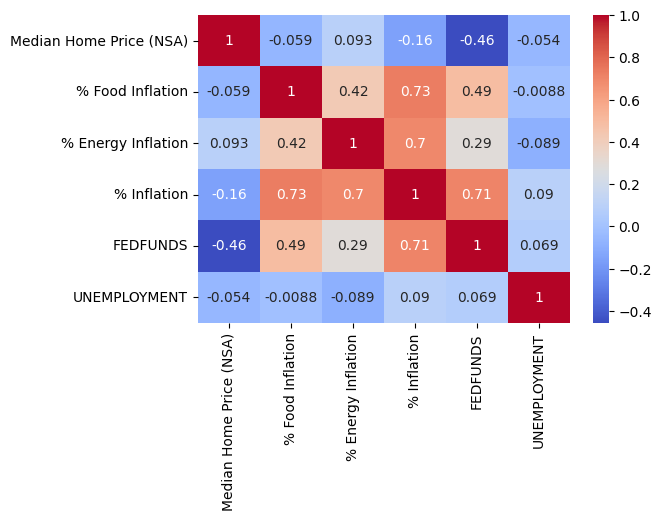

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [ ]:
from sklearn.model_selection import train_test_split
y = data["FEDFUNDS"].astype(int)
X = data[['Median Home Price (NSA)','% Food Inflation','% Energy Inflation','% Inflation','UNEMPLOYMENT']].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**MODELLING**

---



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import math

In [ ]:
Accuracy=[]
for i in range (1,15):
  knn = KNeighborsRegressor(n_neighbors=int(i))
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  Accuracy.append(knn.score(X_test, y_test))
  #print("Accuracy at i =",i,knn.score(X_test, y_test))

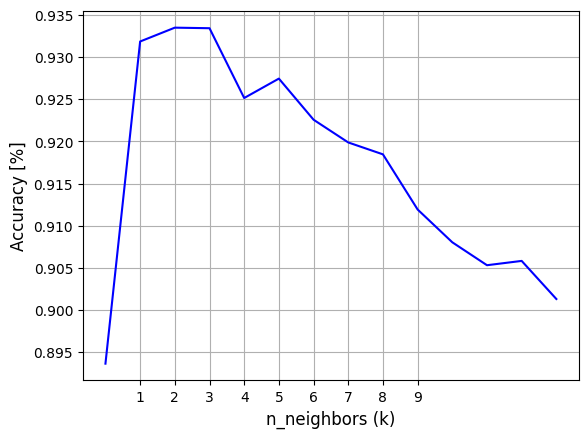

In [ ]:
plt.ylabel('Accuracy [%]',fontsize=12)
plt.xlabel('n_neighbors (k)',fontsize=12)
plt.xticks(range(1,10))
plt.grid('minor')
plt.plot(Accuracy, color='blue')

In [ ]:
from sklearn.model_selection import GridSearchCV
RFR_grid = {
    #'n_estimators': [25,50,100,150],
    #'max_features': ['auto', 'sqrt', 'log2','none'],
    #'max_depth' : [3,4,5,6,7,8],
    #'criterion' :['poisson', 'absolute_error', 'friedman_mse', 'squared_error']
}
RFRgrid= GridSearchCV(RandomForestRegressor(),RFR_grid)

In [ ]:
#RFRgrid.fit(X_train, y_train)

In [ ]:
#RFRgrid.best_estimator_

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
models = [LinearRegression(),
          GaussianNB(),
          KNeighborsRegressor(n_neighbors=int(3)),
          SVR(kernel='rbf', C=1000, gamma="scale"),
          RandomForestRegressor(criterion='poisson', max_depth=8, max_features='auto'),
          DecisionTreeRegressor()]
mae_l = []
rmse_l = []
score_l =[]
time =[]
name=[]
for model in models:
  t1 = datetime.datetime.now()
  model_name = model.__class__.__name__
  model.fit(X_train, y_train)
  t2= datetime.datetime.now()
  d = round((t2-t1).microseconds/1000,1)
  y_pred = model.predict(X_test)
  mae = round(mean_absolute_error(y_test, y_pred),2)
  rmse = round(math.sqrt(mean_squared_error(y_test, y_pred)),2)
  score = round(model.score(X_test, y_test),2)
  mae_l.append(mae)
  rmse_l.append(rmse)
  score_l.append(score)
  time.append(d)
  name.append(model_name)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



In [ ]:
Table= pd.DataFrame(np.column_stack([name, mae_l, rmse_l, score_l, time]),columns=['Name','MAE','RMSE','Score','Time (s)'])
Table

,Name,MAE,RMSE,Score,Time (s)
0,LinearRegression,1.72,2.16,0.66,37.4
1,GaussianNB,1.61,2.33,0.35,3.5
2,KNeighborsRegressor,0.59,0.96,0.93,1.9
3,SVR,1.33,1.97,0.72,113.3
4,RandomForestRegressor,0.48,0.76,0.96,273.1
5,DecisionTreeRegressor,0.44,1.02,0.93,3.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = data.values

In [ ]:
silhouette = []
for k in range(3, 15):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(X)
 score = silhouette_score(X, kmeans.labels_)
 silhouette.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

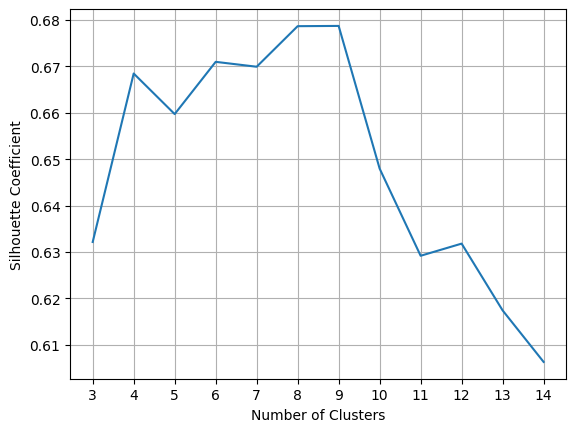

In [ ]:
plt.plot(range(3, 15), silhouette)
plt.xticks(range(3, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

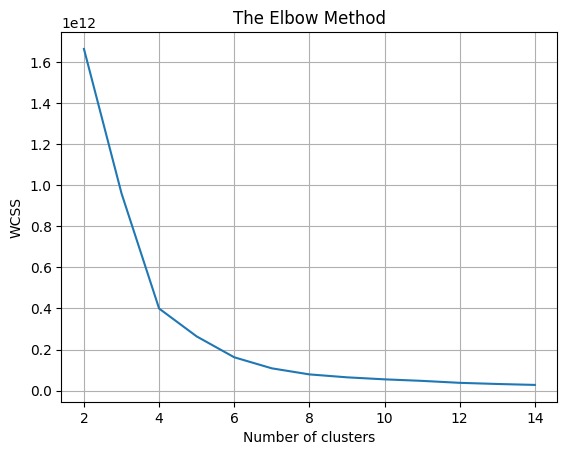

In [ ]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [ ]:
model = KMeans(n_clusters=6)
model.fit(X)
y_pred = model.predict(X)
df_final['Class']=y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



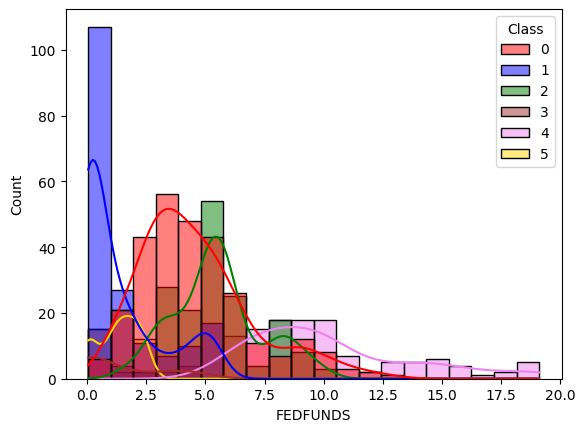

In [ ]:
palette = ['red','blue','green','brown','violet','gold']
sns.histplot(x='FEDFUNDS',hue= 'Class', data= df_final, palette=palette, kde=True);
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

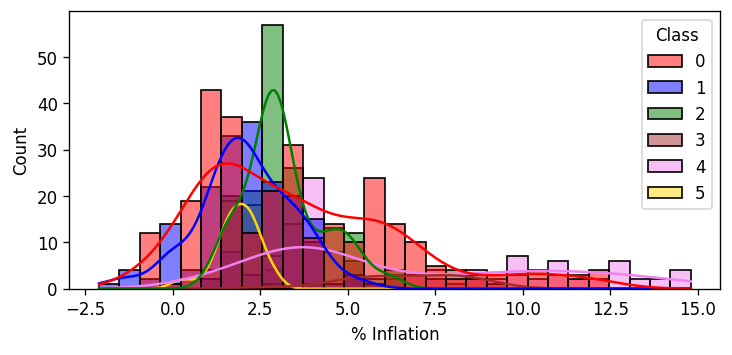

In [ ]:
palette = ['red','blue','green','brown','violet','gold']
sns.histplot(x='% Inflation',hue= 'Class', data= df_final, palette=palette, kde=True);
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})